In [1]:
import os
from os.path import join, sep
from glob import glob
from random import choice

In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Rescaling, concatenate
from dotenv import find_dotenv, load_dotenv

In [3]:
from src.addons.images.load import load_image
from src.addons.watermark.layers import InverseRescaling
from src.addons.images.color import SeparateYComponentLayer, rgb_to_ycbcr, ycbcr_to_rgb

---

In [4]:
_ = load_dotenv(find_dotenv())

In [5]:
images_path = glob(join(os.environ.get("RAW_PATH"), "images") + sep + "*.jpg")
image_path = choice(images_path)

In [6]:
image = load_image(image_path)
image = Rescaling(scale=1.0 / 255.)(image)

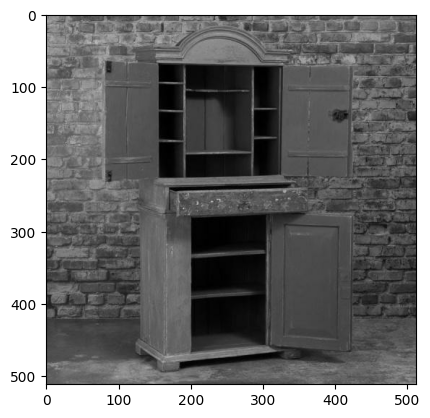

In [7]:
plt.imshow(image.numpy(), cmap="gray")

In [8]:
image_ = InverseRescaling(scale=255, offset=0.)(image)

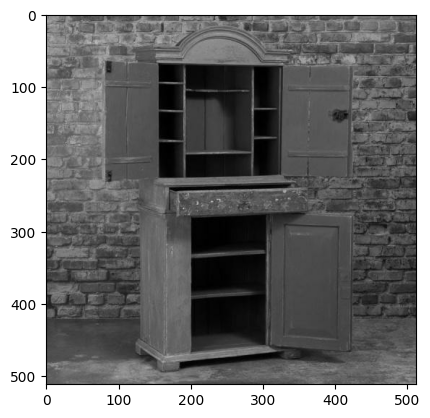

In [9]:
plt.imshow(tf.cast(image_.numpy(), tf.int32), cmap="gray")

---

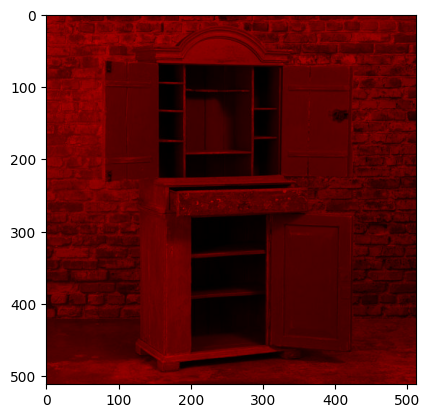

In [10]:
ycbcr_img = rgb_to_ycbcr(image)
plt.imshow(ycbcr_img.numpy())

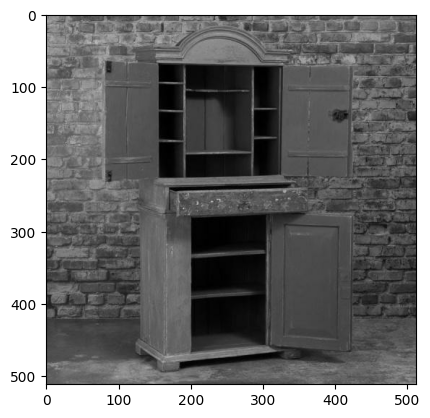

In [11]:
img = ycbcr_to_rgb(ycbcr_img)
plt.imshow(img.numpy())

---

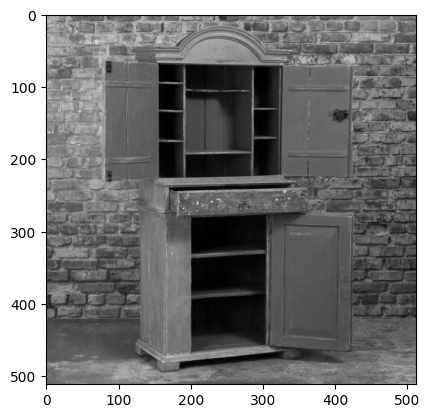

In [13]:
y_img, cbcr_img = SeparateYComponentLayer()(tf.expand_dims(ycbcr_img, axis=0))
plt.imshow(y_img.numpy()[0], cmap="gray")

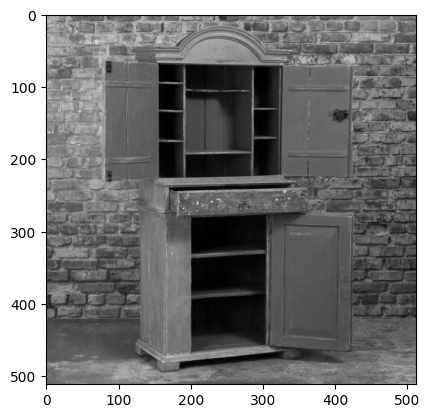

In [17]:
comb_img = concatenate([y_img, cbcr_img], axis=-1)
plt.imshow(y_img.numpy()[0], cmap="gray")